In [20]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

In [116]:
#вычисляем параметры бета-распределения исходя из среднего и дисперсии

def ab(mean, var): 
    a = (1 - mean)*mean**2/var - mean
    b = a*(1 - mean)/mean
    return a, b

a, b = ab(0.5, 0.05) #параметры априорного распределения

In [43]:
na = 1000 #количество пользователей в группе A
nb = 1000 #количество пользователей в группе B
ca = 500 #число сконвертившихся пользователей в группе A
cb = 530 #число сконвертившихся пользователей в группе B

In [90]:
N = 1000 #количество точек в разбиении для расчета апостериорного распределения

In [117]:
x = np.linspace(1/N, 1 - 1/N, N)

In [92]:
#вычисляем апостериорные распределения исходя из наблюдений

posteriorA = beta.pdf(x, a + ca, b + na - ca)
posteriorB = beta.pdf(x, a + cb, b + nb - cb)

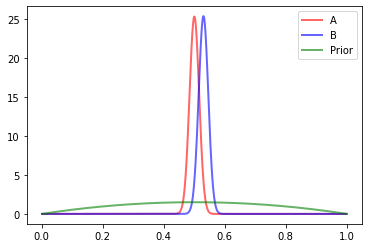

In [125]:
fig, ax = plt.subplots(1, 1)
_ = ax.plot(x, posteriorA, 'r-', lw=2, alpha=0.6, label='A')
_ = ax.legend()
_ = ax.plot(x, posteriorB, 'b-', lw=2, alpha=0.6, label='B')
_ = ax.legend()
_ = ax.plot(x, beta.pdf(x, a, b), 'g-', lw=2, alpha=0.6, label='Prior')
_ = ax.legend()

In [94]:
#вычисляем совместное распределение для вариантов А и B

joint_posterior = np.zeros(shape=(N, N))
for i in range(N):
    for j in range(N):
        joint_posterior[i,j] = posteriorA[i] * posteriorB[j]

In [126]:
#вычисляем функцию ошибки для вариантов А и B

errorFunctionA = 0.0
for i in range(N):
    for j in range(i, N):
        errorFunctionA += joint_posterior[i,j]
        
errorFunctionB = 0.0
for i in range(N):
    for j in range(0, i):
        errorFunctionB += joint_posterior[i,j]

errorFunctionA = errorFunctionA/(N*N)
errorFunctionB = errorFunctionB/(N*N)

In [129]:
# sanity check, проверям, что сумма вероятностей равна 1
errorFunctionA + errorFunctionB 

1.002005012027542

In [109]:
# вычисляем функцию потерь

def loss(i, j, var):
    if var == 'A':
        return max(j*0.01 - i*0.01, 0.0)
    if var == 'B':
        return max(i*0.01 - j*0.01, 0.0)

lossFunction = 0.0
for i in range(N):
    for j in range(N):
        lossFunction += joint_posterior[i,j] * loss(i,j,'B')
lossFunction = lossFunction/(N*N)

In [110]:
lossFunction

0.00933633246720731